<a href="https://colab.research.google.com/github/CR-Reyes/Fiscomp/blob/master/RandomNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Números aleatorios y distribuciones de probabilidad

## LCG

Generaremos nuestro propio generador por congruencia lineal. Siguiendo el modelo:

$$x_{i+1} = (ax_i + c) \mod m$$

Donde $a=106$, $c=1283$ y $m=6075$.


Primero importamos algunas librerías de Python.

In [4]:
%pip install skidmarks
import random
import numpy as np
from skidmarks import wald_wolfowitz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

  Created wheel for skidmarks: filename=skidmarks-0.0.6-cp36-none-any.whl size=5052 sha256=a312b256d5555c2c86bda23c90d56a8a46c93136c7a9e27f10e035405776bbef
  Stored in directory: /root/.cache/pip/wheels/85/a3/c5/cd9e94e89c159d669e2f89da0e4dc826b14e8564b465e51022
Successfully built skidmarks


Ahora sí construimos la función generadora con los parámetros mencionados.

In [5]:
# Natural -> Real
# produce un número pseudoaleatorio usando el
#   generador por congruencia lineal prototípico
#   x_{i+1} = (ax_i + c) \mod m
def lcg(seed=1, a=106, c=1283, m=6075):
    x = seed
    while True:
        x = (a*x + c)%m
        yield x/m

Inicializamos nuestro generador "a" y generamos a partir de él 12,000 números pseudoaleatorios. Observamos que la secuancia pasa el runstest de aleatoriedad.

In [6]:
a = lcg()
rand1D = np.zeros([12000,1])
for i in range(12000):
    rand1D[i] = next(a)

print("RunsTest:", "Passed" if not wald_wolfowitz(rand1D)['p'] < 0.05
      else "Not Passed")

RunsTest: Passed


Sin embargo, al explorar la secuencia de manera gráfica observamos que existe un patrón muy definido.

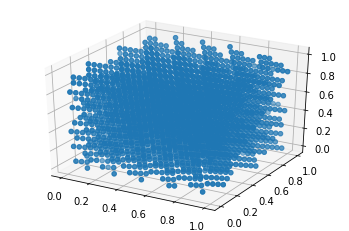

In [7]:
# Preparar para graficar en 3D
b = lcg(2020)
rand3D = np.zeros([4000,3])
for i in range(4000):
    rand3D[i, 0] = next(b)
    rand3D[i, 1] = next(b)
    rand3D[i, 2] = next(b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rand3D[:,0], rand3D[:,1], rand3D[:,2])

Esto significa que nuestro generador de números pseudoaleatorios no es muy robusto.

## Mersenne Twister

Ahora compararemos nuestro generador anterior con el generador por default de Python que es una implementación de Mersenne Twister, un algoritmo bastante robusto para la generación de números pseudoaleatorios.

In [8]:
random.seed(2020)
rand1D_mt = np.zeros([12000,1])
for i in range(12000):
    rand1D_mt[i] = random.random()
print("RunsTest:", "Passed" if not wald_wolfowitz(rand1D_mt)['p'] < 0.05
      else "Not Passed")

RunsTest: Passed


Vemos que también pasa el runstest. Pero como hemos visto antes, no podemos confiarnos únicamente de esta métrica.

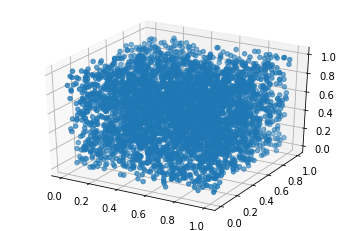

In [9]:
random.seed(2020)
rand3D_mt = np.zeros([4000,3])
for i in range(4000):
    rand3D_mt[i, 0] = random.random()
    rand3D_mt[i, 1] = random.random()
    rand3D_mt[i, 2] = random.random()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(rand3D_mt[:,0], rand3D_mt[:,1], rand3D_mt[:,2])

Finalmente, observamos en la gráfica 3D que no existe un patrón aparente que pruebe que la secuencia generada por el Mersenne Twister no sea aleatoria.

## Generador exponencial

In [173]:
def exp_inv(x):
    return np.log(1-x)

In [182]:
rand1D_exp = np.zeros([12000, 1])
for i in range(12000):
    rand1D_exp[i] = np.exp(3*exp_inv(random.random()))

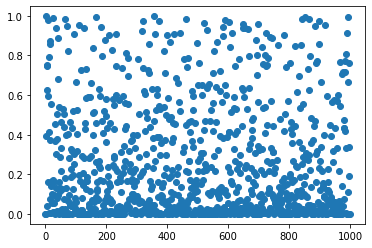

In [183]:
plt.scatter(np.arange(1000), rand1D_exp[:1000])

## Generador lineal

In [188]:
def gauss_inv(x):
    return np.sqrt(-np.log(1-x))

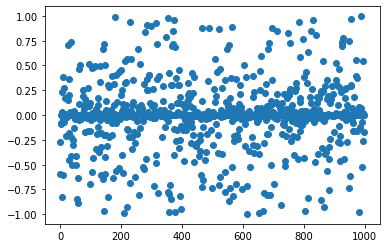

In [198]:
rand1D_gauss = np.zeros([12000, 1])
for i in range(12000):
    inverse = gauss_inv(random.random())
    rand1D_gauss[i] = random.choice([1,-1])*np.exp(-5*inverse**2)
plt.scatter(np.arange(1000), rand1D_gauss[:1000])